# Chapter 8

## 1 nex

## BLCDIS

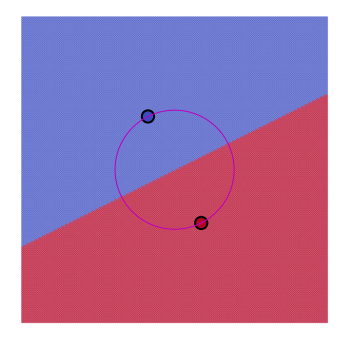

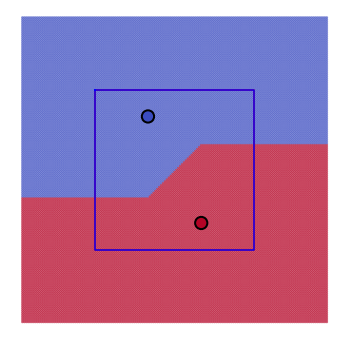

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.neighbors import KNeighborsClassifier

Tr = np.array([[-7, 14], [7, -14]])  
Cl = np.array([1, 2])

Nexemplars = Tr.shape[0]
mn, mx = -40, 40
N = 2 * (mx - mn)

Te = np.array([[mn + j * (mx - mn) / N, mn + i * (mx - mn) / N] 
                for i in range(N + 1) for j in range(N + 1)])

methods = ['euclidean', 'manhattan'] 
for m, method in enumerate(methods):
    for k in range(1, Nexemplars):
        plt.figure(figsize=(6, 6))
        plt.axis([mn, mx, mn, mx])
        plt.axis('equal')
        plt.axis('off')
        
        knn = KNeighborsClassifier(n_neighbors=k, metric=method)
        knn.fit(Tr, Cl)
        Lb = knn.predict(Te)
        
        plt.scatter(Te[:, 0], Te[:, 1], c=Lb, s=3, cmap='coolwarm', alpha=0.5)
        plt.scatter(Tr[:, 0], Tr[:, 1], c=Cl, s=150, edgecolors='k', linewidth=2, cmap='coolwarm')
        
        if k == 1 and method == 'euclidean':
            circle = plt.Circle((0, 0), np.linalg.norm(Tr[0]), color='m', fill=False)
            plt.gca().add_patch(circle)
        elif k == 1 and method == 'manhattan':
            plt.plot([-21, 21, 21, -21, -21], [21, 21, -21, -21, 21], 'r')
            plt.plot([-21, 21, 21, -21, -21], [21, 21, -21, -21, 21], 'b')
        
        plt.show()

## Kmeans-sub

## Kmeans

## Knn prob

## Knn probdist

## Medoids

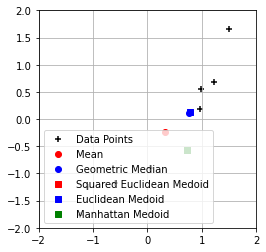

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

mu = [0, 0]
sig = [1, 1]
rho = -0.3

cov = rho * np.sqrt(sig[0] * sig[1])
sigma = [[sig[0], cov], [cov, sig[1]]]

N = 10

points = multivariate_normal.rvs(mean=mu, cov=sigma, size=N)
points = np.sort(points, axis=0)

mn, mx = np.floor(points.min()), np.ceil(points.max())

distances = np.zeros((N, 3))
for i in range(N):
    dv = points - points[i]
    d = np.sum(dv**2, axis=1)  
    d1 = np.sqrt(d)  
    d2 = np.sum(np.abs(dv), axis=1)  
    distances[i, 0] = np.sum(d)
    distances[i, 1] = np.sum(d1)
    distances[i, 2] = np.sum(d2)

dmu = points[np.argmin(distances[:, 0])]
dmu1 = points[np.argmin(distances[:, 1])]
dmu2 = points[np.argmin(distances[:, 2])]

emu = np.mean(points, axis=0)

emu1, emu2 = emu.copy(), emu.copy()
for _ in range(100):
    dv1 = points - emu1
    dv2 = points - emu2
    d1 = np.linalg.norm(dv1, axis=1)
    d2 = np.sum(np.abs(dv2), axis=1)
    emu1 = np.sum(points / d1[:, None], axis=0) / np.sum(1 / d1)
    emu2 = np.sum(points / d2[:, None], axis=0) / np.sum(1 / d2)

plt.figure()
plt.scatter(points[:, 0], points[:, 1], marker='+', color='k', label='Data Points')
plt.scatter(*emu, color='r', marker='o', label='Mean')
plt.scatter(*emu1, color='b', marker='o', label='Geometric Median')
plt.scatter(*dmu, color='r', marker='s', label='Squared Euclidean Medoid')
plt.scatter(*dmu1, color='b', marker='s', label='Euclidean Medoid')
plt.scatter(*dmu2, color='g', marker='s', label='Manhattan Medoid')
plt.legend(loc='lower left')
plt.xlim(mn, mx)
plt.ylim(mn, mx)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

## ML Kmeans 3

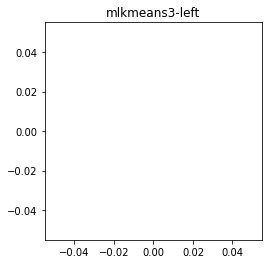

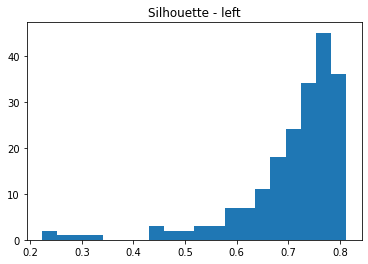

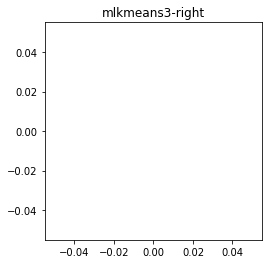

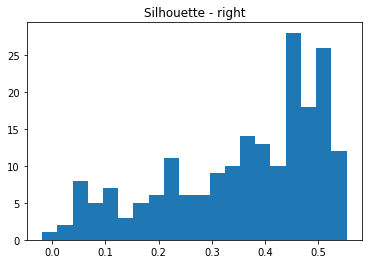

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.stats import multivariate_normal

filename = 'mlkmeans3'
sigma = np.array([[1, 0], [0, 1]]) / 10
N = 100

left = np.random.multivariate_normal([1, 0], sigma, N)
right = np.random.multivariate_normal([-1, 0], sigma, N)
data1 = np.vstack((left, right))
data2 = np.tile(np.array([1, 5]), (2 * N, 1)) * data1

k = 2

kmeans1 = KMeans(n_clusters=k, n_init=10, random_state=0).fit(data1)
labels1 = kmeans1.labels_
means1 = kmeans1.cluster_centers_

plt.figure(1)
plt.axis('square')
plt.scatter(data1[:, 0], data1[:, 1], c=labels1, cmap='viridis')
plt.scatter(means1[:, 0], means1[:, 1], c='black', marker='x', s=100)
plt.title(f'{filename}-left')
plt.show()

plt.figure(2)
silhouette_vals1 = silhouette_samples(data1, labels1, metric='euclidean')
plt.hist(silhouette_vals1, bins=20)
plt.title('Silhouette - left')
plt.show()

kmeans2 = KMeans(n_clusters=k, n_init=10, random_state=0).fit(data2)
labels2 = kmeans2.labels_
means2 = kmeans2.cluster_centers_

plt.figure(3)
plt.axis('square')
plt.scatter(data2[:, 0], data2[:, 1], c=labels2, cmap='viridis')
plt.scatter(means2[:, 0], means2[:, 1], c='black', marker='x', s=100)
plt.title(f'{filename}-right')
plt.show()

plt.figure(4)
silhouette_vals2 = silhouette_samples(data2, labels2, metric='euclidean')
plt.hist(silhouette_vals2, bins=20)
plt.title('Silhouette - right')
plt.show()


## ML Medoids 2 complete

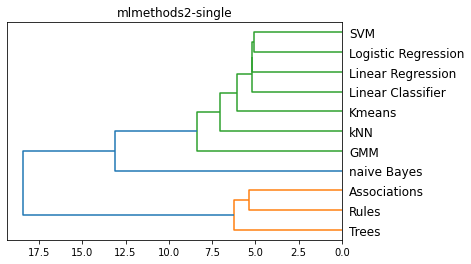

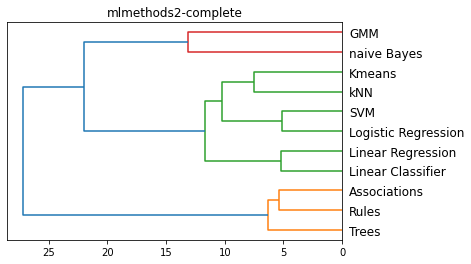

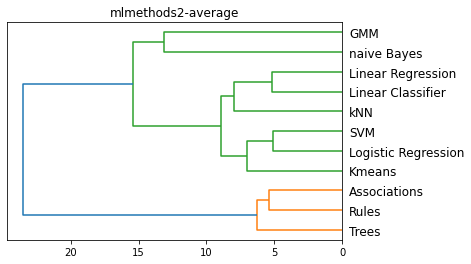

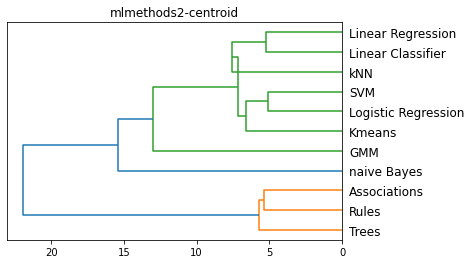

k = 2, Sum of squared distances (inertia): 560.625
Cluster 1:
['naive Bayes' 'kNN' 'Linear Classifier' 'Linear Regression'
 'Logistic Regression' 'SVM' 'Kmeans' 'GMM']
Cluster 2:
['Trees' 'Rules' 'Associations']
k = 3, Sum of squared distances (inertia): 293.5
Cluster 1:
['kNN' 'Linear Classifier' 'Linear Regression' 'Logistic Regression' 'SVM'
 'Kmeans']
Cluster 2:
['Trees' 'Rules' 'Associations']
Cluster 3:
['naive Bayes' 'GMM']
k = 4, Sum of squared distances (inertia): 207.5
Cluster 1:
['naive Bayes']
Cluster 2:
['kNN' 'Linear Classifier' 'Linear Regression' 'Logistic Regression' 'SVM'
 'Kmeans']
Cluster 3:
['GMM']
Cluster 4:
['Trees' 'Rules' 'Associations']
k = 5, Sum of squared distances (inertia): 130.0
Cluster 1:
['GMM']
Cluster 2:
['Trees' 'Rules' 'Associations']
Cluster 3:
['Logistic Regression' 'SVM' 'Kmeans']
Cluster 4:
['kNN' 'Linear Classifier' 'Linear Regression']
Cluster 5:
['naive Bayes']


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

filename = 'mlmethods2'
Names = ['Trees', 'Rules', 'naive Bayes', 'kNN', 'Linear Classifier', 'Linear Regression', 'Logistic Regression', 'SVM', 'Kmeans', 'GMM', 'Associations']
Features = ['geom', 'stat', 'rule', 'split', 'grad', 'symb', 'real', 'sup', 'unsup', 'multi']

M = np.array([
    [1, 0, 3, 3, 0, 3, 2, 3, 2, 3],  
    [0, 0, 3, 3, 1, 3, 2, 3, 0, 2],  
    [1, 3, 1, 3, 1, 3, 1, 3, 0, 3],  
    [3, 1, 0, 2, 2, 1, 3, 3, 0, 3],  
    [3, 0, 0, 0, 3, 1, 3, 3, 0, 0],  
    [3, 1, 0, 0, 3, 0, 3, 3, 0, 1],  
    [3, 2, 0, 0, 3, 1, 3, 3, 0, 0],  
    [2, 2, 0, 0, 3, 2, 3, 3, 0, 0],  
    [3, 2, 0, 1, 2, 1, 3, 0, 3, 1],  
    [1, 3, 0, 0, 3, 1, 3, 0, 3, 1],  
    [0, 0, 3, 3, 0, 3, 1, 0, 3, 1]   
])

w1 = 5
w2 = 3
w3 = 1
W = np.array([w1, w1, w1, w2, w2, w3, w3, w3, w3, w3])

D = M * W

methods = ['single', 'complete', 'average', 'centroid']

for m in methods:
    plt.figure()
    method = m
    L = linkage(D, method)
    dendrogram(L, color_threshold='default', orientation='left', labels=Names)
    plt.title(f'{filename}-{method}')
    plt.show()

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, n_init=5, random_state=0)
    idx = kmeans.fit_predict(D)
    sumd = np.sum(kmeans.inertia_)
    
    print(f'k = {k}, Sum of squared distances (inertia): {sumd}')
    for i in range(k):
        print(f"Cluster {i + 1}:")
        print(np.array(Names)[idx == i]) 

## Nonmon Dendogram

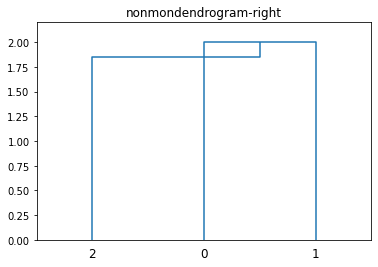

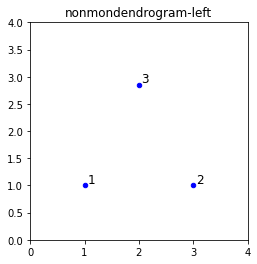

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

filename = 'nonmondendrogram'

x = 2
d = 0.1
y = np.sqrt((3/4) * x**2 + d * (2 * x + d))

D = np.array([[0, 0], [x, 0], [x / 2, y]]) + 1  

methods = ['centroid']


for m in methods:
    plt.figure(2) 
    method = m
    L = linkage(D, method)  
    PD = pdist(D)  
    

    dendrogram(L, color_threshold='default')
    plt.ylim([0, 2.2])
    plt.title(f'{filename}-right')
    plt.show()
    
    plt.figure(3)
    plt.scatter(D[:, 0], D[:, 1], s=20, c='blue', label='Points', marker='o')
    plt.axis([0, 4, 0, 4])
    plt.gca().set_box_aspect(1) 
    plt.title(f'{filename}-left')
    
    for i in range(len(D)):
        plt.text(D[i, 0] + 0.05, D[i, 1] + 0.05, str(i + 1), fontsize=12)
    
    plt.show()


## Random Dendogram

Spearman correlation for complete: 0.5691352429297899


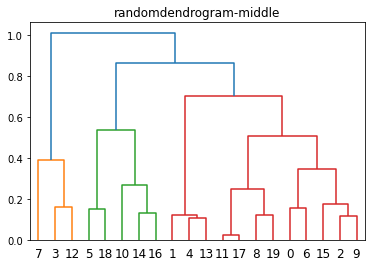

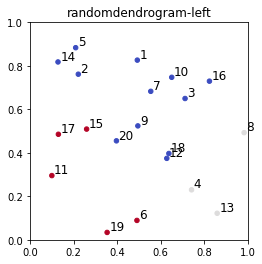

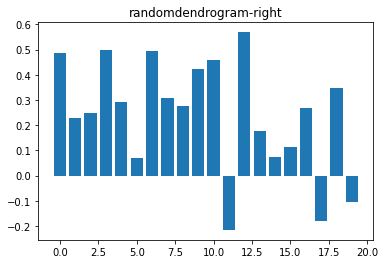

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from scipy.stats import spearmanr
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples

filename = 'randomdendrogram'
D = np.random.rand(20, 2)  

methods = ['complete']  
f = 1 


for method in methods:
    
    plt.figure(f)
    f += 1
    L = linkage(D, method)
    
    
    PD = pdist(D)
    c, d = cophenet(L, PD)
    r, _ = spearmanr(PD, d)
    print(f'Spearman correlation for {method}: {r}')

    dendrogram(L, color_threshold='default')
    plt.title(f'{filename}-middle')
    plt.show()

    plt.figure(f)
    f += 1
    clustering = AgglomerativeClustering(n_clusters=3, linkage=method)
    T = clustering.fit_predict(D)
    
    plt.scatter(D[:, 0], D[:, 1], s=20, c=T, cmap='coolwarm', marker='o')
    d = 0.01
    for i in range(D.shape[0]):
        plt.text(D[i, 0] + d, D[i, 1] + d, str(i + 1), fontsize=12)
    plt.title(f'{filename}-left')
    plt.axis([0, 1, 0, 1])
    plt.gca().set_box_aspect(1)
    plt.show()

    plt.figure(f)
    f += 1
    silhouette_vals = silhouette_samples(D, T, metric='euclidean')
    plt.bar(range(D.shape[0]), silhouette_vals)
    plt.title(f'{filename}-right')
    plt.show()

## Silhouette

## Twonex

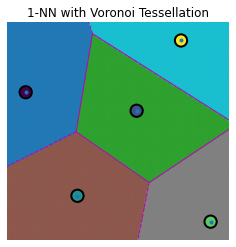

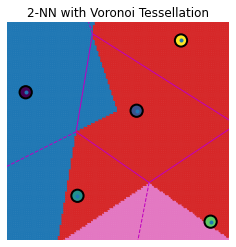

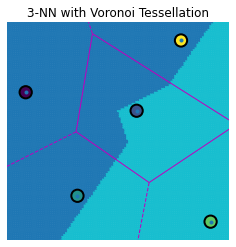

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.neighbors import KNeighborsClassifier

Tr = np.array([[-25, 5], [-11, -23], [17, 19], [5, 0], [25, -30]])
Cl = np.array([1, 3, 5, 2, 4])

Nexemplars = Tr.shape[0]

mn = -40
mx = 40
N = 2 * (mx - mn)

Te = np.zeros(((N + 1) ** 2, 2))
for i in range(N + 1):
    for j in range(N + 1):
        Te[i * (N + 1) + j, 0] = mn + j * (mx - mn) / N
        Te[i * (N + 1) + j, 1] = mn + i * (mx - mn) / N

def knn_voronoi_plot(k, Te, Tr, Cl, title):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Tr, Cl)
    Lb = knn.predict(Te)
    
    vor = Voronoi(Tr)
    
    fig, ax = plt.subplots()
    ax.set_xlim(mn, mx)
    ax.set_ylim(mn, mx)
    ax.set_aspect('equal')
    ax.axis('off')
    
    voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='m', line_width=1)
    
    scatter = ax.scatter(Te[:, 0], Te[:, 1], c=Lb, s=3, cmap=plt.cm.get_cmap('tab10'))
    
    ax.scatter(Tr[:, 0], Tr[:, 1], c=Cl, s=150, marker='o', edgecolor='k', linewidth=2)
    
    ax.set_title(title)
    plt.show()

knn_voronoi_plot(1, Te, Tr, Cl, "1-NN with Voronoi Tessellation")

knn_voronoi_plot(2, Te, Tr, Cl, "2-NN with Voronoi Tessellation")

knn_voronoi_plot(3, Te, Tr, Cl, "3-NN with Voronoi Tessellation")
